In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won'
t be saved outside of the current session


/kaggle/input/ultima/ultima_all_clean.csv


In [3]:
import numpy as np
import pandas as pd
!pip install numpy

# Ex. 1 Perform preprocessing as follows :
1. Set index of data to hn numbers

2. Remove missing values

3. Remove these unnecessary columns hiv, size, utmet, vgmet, surgery, pchemo

4. Change age into 2 values 'Young' (age <= 20) and 'Old' (age > 20)

5. Separate data into groups based on pmmet values

6. Remove these unnecessary columns hiv, size, utmet, vgmet, surgery, pchemofor each group, randomly choose 10 data**

In [20]:
data = pd.read_csv('../input/ultima/ultima_all_clean.csv',sep=',',header=0)
data

,hn,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
0,2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2,2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
4,2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1718,3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
1719,3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1720,2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1721,3302539,44,3,0.0,0.0,0,1,1.0,0.0,5.0,...,15.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 1.1 Set index of data to hn numbers

In [21]:
data_clean = data
data_clean = data_clean.set_index('hn')
data_clean

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2634477,52,2,0.0,0.0,0,0,0.0,5.0,NaN,5.0,...,35.0,6.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169688,47,2,0.0,0.0,0,0,1.0,0.0,5.0,4.0,...,42.0,5.0,2.0,1.1,0.0,0.0,0.0,0.0,0.0,2.0
3167041,39,1,0.0,0.0,0,0,1.0,0.0,5.0,2.0,...,20.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2623351,46,2,0.0,0.0,0,0,1.0,0.0,5.0,1.0,...,13.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 1.2 Remove missing values

In [22]:
data_clean = data_clean.dropna(0,'any')
data_clean

,age,parity,hiv,menopaus,disease,surgery,conization,OPDsize,appearance,stage,...,nodeyiel,RHlvsi,depth,size,utmet,vgmargin,vgmet,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,,,,,
2631840,52,3,0.0,0.0,1,1,0.0,5.0,4.0,5.0,...,21.0,0.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2633481,32,2,0.0,0.0,0,1,0.0,5.0,1.0,5.0,...,11.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,2.0
2633633,38,2,0.0,0.0,0,0,0.0,2.0,1.0,4.0,...,20.0,16.0,3.0,3.8,0.0,0.0,0.0,0.0,0.0,2.0
2630496,55,3,0.0,1.0,0,0,1.0,0.0,5.0,4.0,...,17.0,9.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2450167,67,5,0.0,1.0,1,0,0.0,3.0,2.0,4.0,...,34.0,38.0,3.0,3.7,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,57,2,0.0,1.0,1,1,1.0,0.0,5.0,4.0,...,18.0,0.0,3.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0
3813471,42,2,0.0,0.0,1,0,0.0,3.0,2.0,4.0,...,33.0,999.0,3.0,2.7,0.0,2.0,1.0,1.0,1.0,0.0
3812935,53,1,0.0,1.0,1,0,1.0,0.0,5.0,4.0,...,17.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# 1.3 Remove these unnecessary columns hiv, size, utmet, vgmet, surgery, pchemo

In [23]:
data_clean = data_clean.drop('hiv',1)
data_clean = data_clean.drop('size',1)
data_clean = data_clean.drop('utmet',1)
data_clean = data_clean.drop('vgmet',1)
data_clean = data_clean.drop('surgery',1)
data_clean = data_clean.drop('pchemo',1)
data_clean.columns

Index(['age', 'parity', 'menopaus', 'disease', 'conization', 'OPDsize',
       'appearance', 'stage', 'Wardsize', 'finalhisto', 'nodeyiel', 'RHlvsi',
       'depth', 'vgmargin', 'pelvicme', 'pmmet', 'adnmet'],
      dtype='object')

# 1.4 Change age into 2 values 'Young' (age <= 20) and 'Old' (age > 20)

In [24]:
data_clean['age'] = (data_clean['age'] <= 20).replace(True,'Young').replace(False,'Old')
data_clean

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2631840,Old,3,0.0,1,0.0,5.0,4.0,5.0,5.0,3.0,21.0,0.0,3.0,0.0,0.0,0.0,0.0
2633481,Old,2,0.0,0,0.0,5.0,1.0,5.0,5.0,1.0,11.0,0.0,3.0,0.0,1.0,0.0,2.0
2633633,Old,2,0.0,0,0.0,2.0,1.0,4.0,3.0,3.0,20.0,16.0,3.0,0.0,0.0,0.0,2.0
2630496,Old,3,1.0,0,1.0,0.0,5.0,4.0,0.0,1.0,17.0,9.0,3.0,0.0,1.0,0.0,0.0
2450167,Old,5,1.0,1,0.0,3.0,2.0,4.0,3.0,1.0,34.0,38.0,3.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812011,Old,2,1.0,1,1.0,0.0,5.0,4.0,1.0,1.0,18.0,0.0,3.0,2.0,0.0,0.0,0.0
3813471,Old,2,0.0,1,0.0,3.0,2.0,4.0,3.0,1.0,33.0,999.0,3.0,2.0,1.0,1.0,0.0
3812935,Old,1,1.0,1,1.0,0.0,5.0,4.0,0.0,1.0,17.0,0.0,3.0,0.0,0.0,1.0,0.0


# 1.5 Separate data into groups based on pmmet values

In [25]:
data_clean_pmmet = data_clean.groupby('pmmet')
data_clean_pmmet.describe()

parity                                               menopaus            \
       count      mean       std  min  25%  50%  75%   max    count      mean   
pmmet                                                                           
0.0    803.0  2.066002  1.259132  0.0  1.0  2.0  2.0  13.0    803.0  0.301370   
1.0    232.0  2.073276  1.233996  0.0  1.0  2.0  2.0   8.0    232.0  0.362069   

       ... pelvicme      adnmet                                               
       ...      75%  max  count      mean       std  min  25%  50%  75%  max  
pmmet  ...                                                                    
0.0    ...      0.0  3.0  803.0  0.463263  0.839833  0.0  0.0  0.0  0.0  2.0  
1.0    ...      1.0  1.0  232.0  0.331897  0.725073  0.0  0.0  0.0  0.0  2.0  

[2 rows x 120 columns]

# 1.6 for each group, randomly choose 10 data

In [26]:
data_clean_random = data_clean.groupby('pmmet').sample(10)
data_clean_random .sort_values(by = ['pmmet'])

,age,parity,menopaus,disease,conization,OPDsize,appearance,stage,Wardsize,finalhisto,nodeyiel,RHlvsi,depth,vgmargin,pelvicme,pmmet,adnmet
hn,,,,,,,,,,,,,,,,,
2814031,Old,6,0.0,0,0.0,3.5,1.0,4.0,4.0,1.0,42.0,2.0,3.0,0.0,0.0,0.0,2.0
2832194,Old,2,0.0,1,0.0,2.0,2.0,6.0,3.0,1.0,28.0,0.0,2.0,1.0,0.0,0.0,0.0
3511560,Old,2,0.0,0,1.0,0.0,5.0,4.0,0.0,1.0,38.0,0.0,1.0,1.0,0.0,0.0,0.0
3042959,Old,2,0.0,0,1.0,0.0,5.0,4.0,0.0,1.0,27.0,3.0,2.0,0.0,0.0,0.0,0.0
3264237,Old,2,0.0,0,0.0,2.0,1.0,6.0,2.0,1.0,30.0,1.0,2.0,0.0,0.0,0.0,0.0
3184473,Old,1,1.0,0,0.0,1.5,1.0,4.0,1.0,1.0,14.0,7.0,2.0,0.0,0.0,0.0,0.0
2822471,Old,1,0.0,0,1.0,3.0,2.0,4.0,3.0,1.0,27.0,9.0,3.0,0.0,0.0,0.0,2.0
2737309,Old,3,0.0,0,1.0,0.0,5.0,1.0,0.0,2.0,12.0,0.0,3.0,2.0,0.0,0.0,0.0
743801,Old,1,0.0,0,1.0,4.0,2.0,5.0,4.0,2.0,27.0,7.0,3.0,0.0,0.0,0.0,0.0


# Ex. 2 P Please explore this dataset and report at least 5 facts about this dataset

In [28]:
import seaborn as sns

<AxesSubplot:xlabel='disease'>

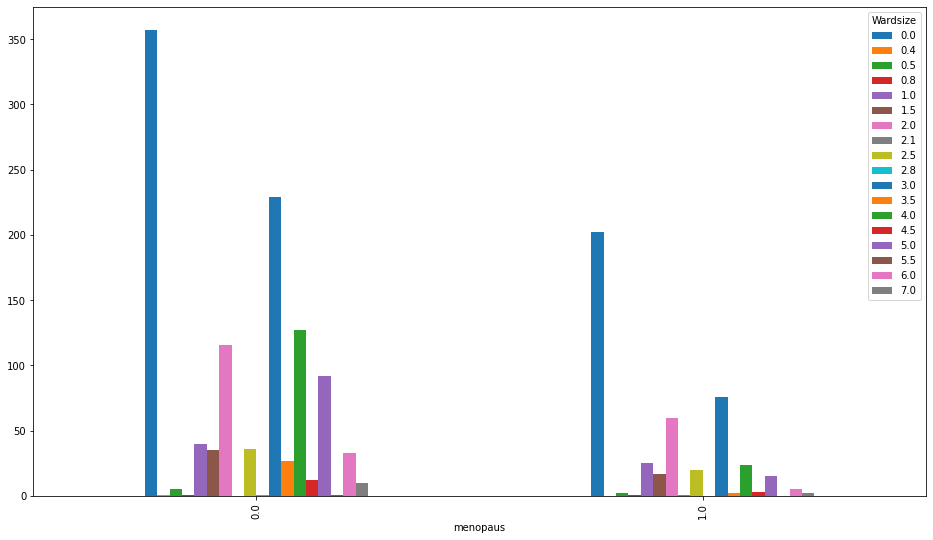

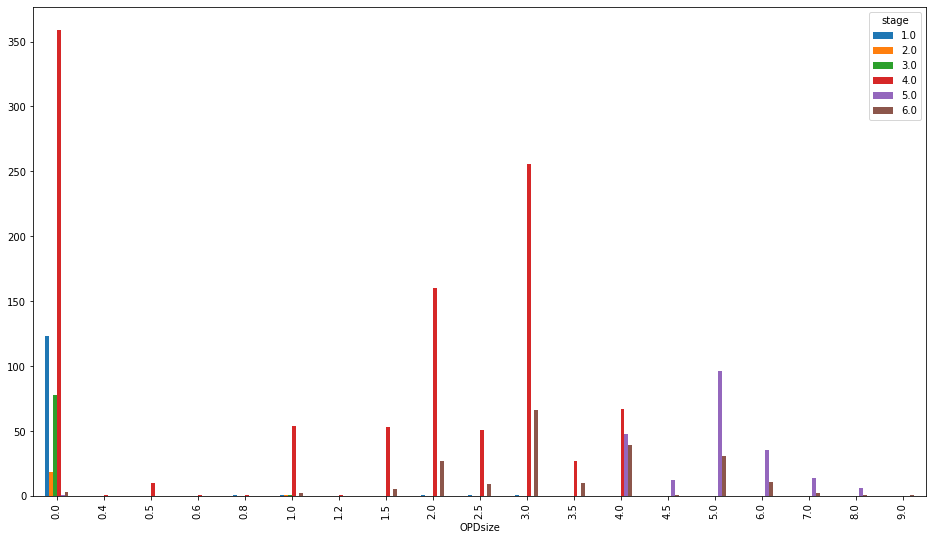

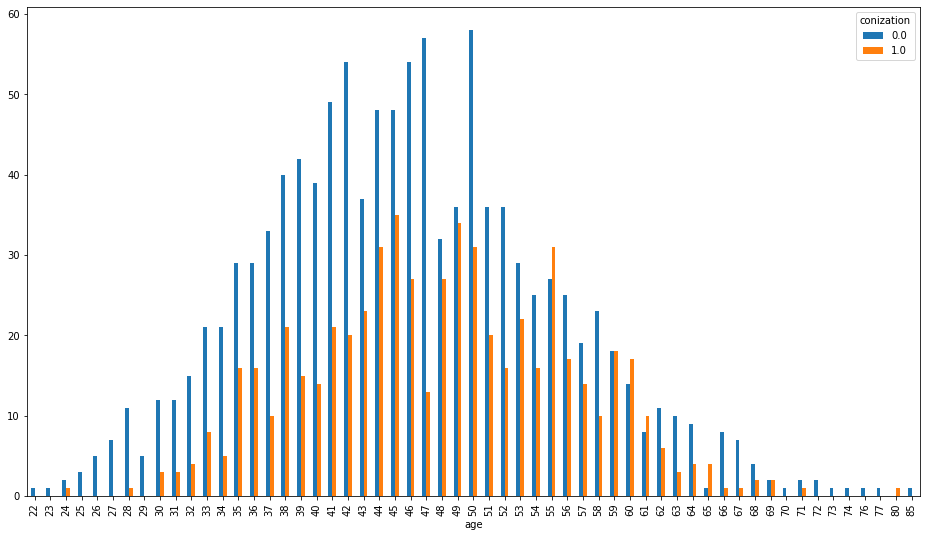

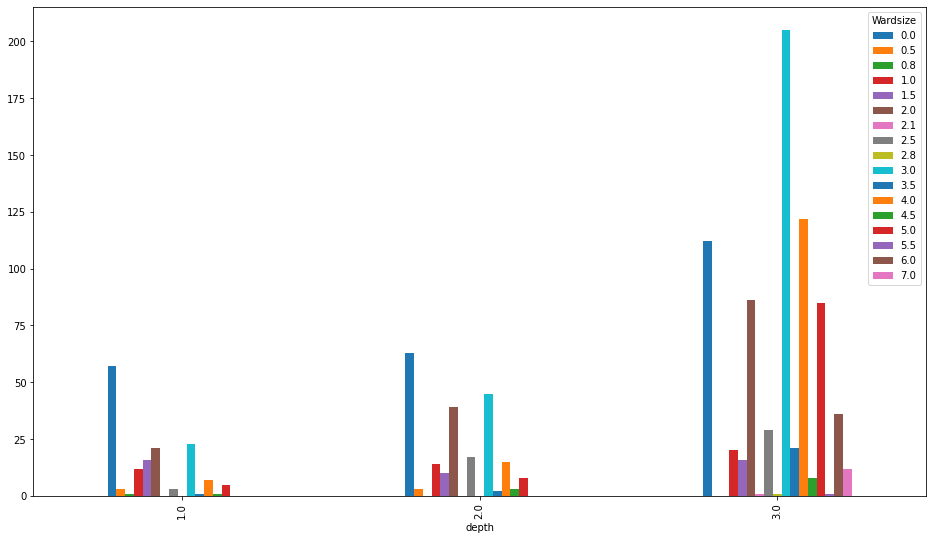

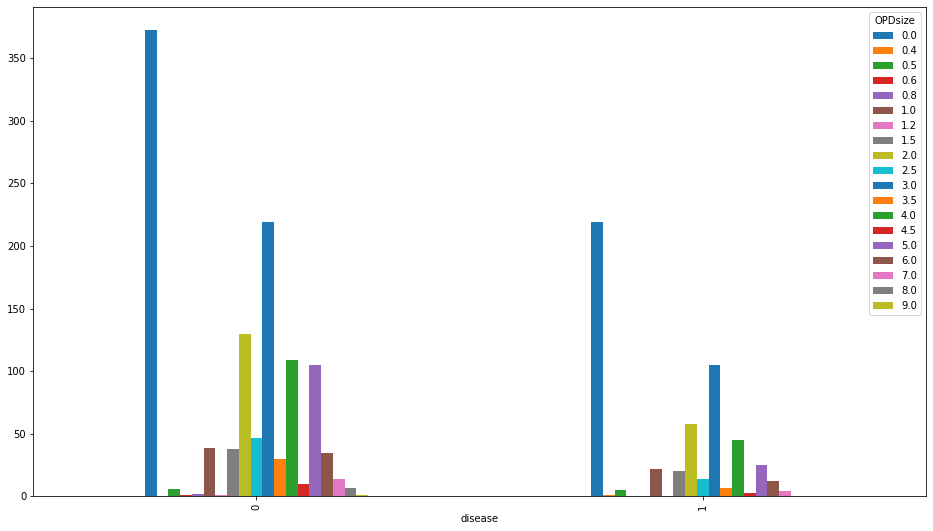

In [48]:
pd.crosstab(df['menopaus'],df['Wardsize']).plot(kind='bar',figsize=(16,9))
pd.crosstab(df['OPDsize'],df['stage']).plot(kind='bar',figsize = (16,9))
pd.crosstab(df['age'],df['conization']).plot(kind='bar',figsize=(16,9)) 
pd.crosstab(df['depth'],df['Wardsize']).plot(kind='bar',figsize=(16,9))
pd.crosstab(df['disease'],df['OPDsize']).plot(kind='bar',figsize=(16,9))